In [46]:
import gym
import numpy as np
from collections import defaultdict
import plot_utils
import gym
from IPython import display
import numpy as np
import pandas as pd
from collections import namedtuple
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
%matplotlib inline

In [47]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_blackjack_values(V):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

def plot_policy(policy):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in policy:
            return policy[x,y,usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(10, 0, -1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])
        plt.xticks(x_range)
        plt.yticks(y_range)
        plt.gca().invert_yaxis()
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.grid(color='w', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
            
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

In [48]:
env = gym.make('Blackjack-v0')
discount =1

In [49]:
def random_policy(state):
    
    prob = np.random.rand()
    
    if prob<0.5:
        return 0
    
    else:
        return 1

In [50]:
def get_trajectory(policy,env):
    
    state = env.reset()
    trajectory = []
    
    
    while True:
        action = random_policy(state)
        next_state,reward,done,_ = env.step(action)
        trajectory.append((state,action,reward))
        state = next_state
        
        if done:
            break
            
    
    return trajectory    

In [51]:
def best_policy(Q):
    
    return dict((k,np.argmax(v)) for k,v in Q.items())

In [52]:
def update_Q(env,tra,Q,G,old_state_actions,N):
    
    states,actions,rewards = zip(*tra)

        
        
    for t in range(len(states)-1,-1,-1):
            
        R = rewards[t]
        S = states[t] 
        A = actions[t]
            
        S_A = (S,A)
            
        G += R
            
        if S_A not in old_state_actions:
                
            N[S_A] +=1
            Q[S][A] += (G - Q[S][A])/N[S_A]
            old_state_actions.append(S_A)
        

In [53]:
def MC_Control(env,iters=500000):
    
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    N = defaultdict(float)
    
    for _ in range(iters):
        
        old_state_actions = []
        G = 0
        
        tra = get_trajectory(random_policy,env)
        
        update_Q(env,tra,Q,G,old_state_actions,N)
        
        policy = best_policy(Q)
        
        
    return Q,policy

In [63]:
Q,policy = MC_Control(env,iters=500000)
V = dict((k,np.max(v)) for k, v in Q.items())

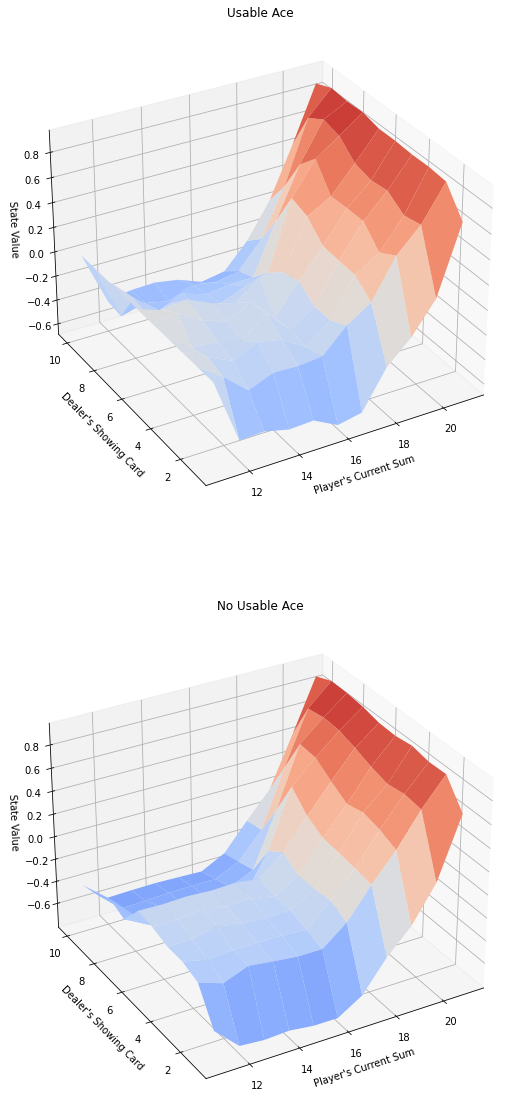

In [64]:
plot_blackjack_values(V)

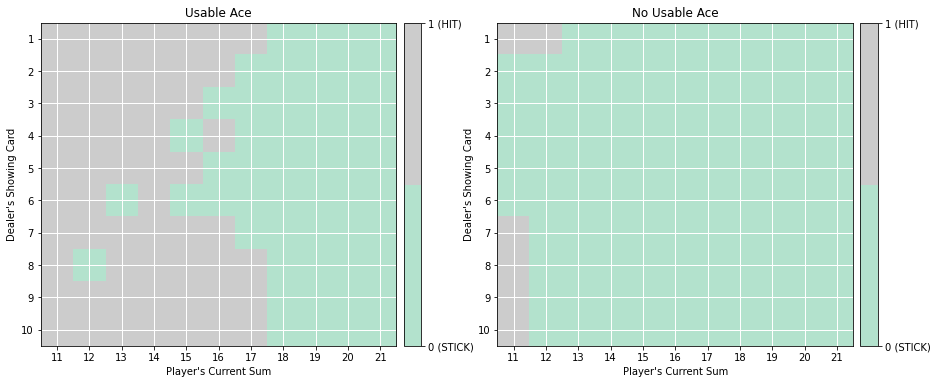

In [65]:
plot_policy(policy)

In [68]:
V

{(15, 7, False): -0.48305513404147665,
 (15, 1, True): -0.5544217687074827,
 (17, 8, False): -0.3943270300333704,
 (17, 2, False): -0.1390230810520664,
 (17, 2, True): -0.027874564459930327,
 (9, 2, False): -0.2923898531375163,
 (11, 10, False): -0.40277078085642276,
 (21, 10, True): 0.8850826044703608,
 (19, 4, False): 0.4527744982290435,
 (14, 3, False): -0.24514811031664963,
 (21, 4, False): 0.9080578512396695,
 (11, 4, False): -0.20845921450151053,
 (12, 5, False): -0.1627670396744658,
 (19, 10, False): -0.007767844056866495,
 (13, 6, False): -0.14498510427010905,
 (20, 6, True): 0.6750788643533122,
 (17, 6, True): -0.040955631399317426,
 (14, 10, False): -0.5695457453614865,
 (15, 1, False): -0.7824742268041233,
 (16, 4, False): -0.2147302904564317,
 (13, 4, False): -0.16341212744090466,
 (12, 4, False): -0.20927936821322823,
 (13, 10, False): -0.5721557648256566,
 (18, 5, False): 0.17945823927765223,
 (16, 10, False): -0.5847424302005518,
 (10, 10, False): -0.44825614636935335,
 